In [47]:
import os
from fidelity_analysis.utils import setup_plotting
from matplotlib import pyplot as plt
import skrf as rf

setup_plotting(dpi=300)

In [48]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
images_dir_path = os.path.join(current_path, "images")

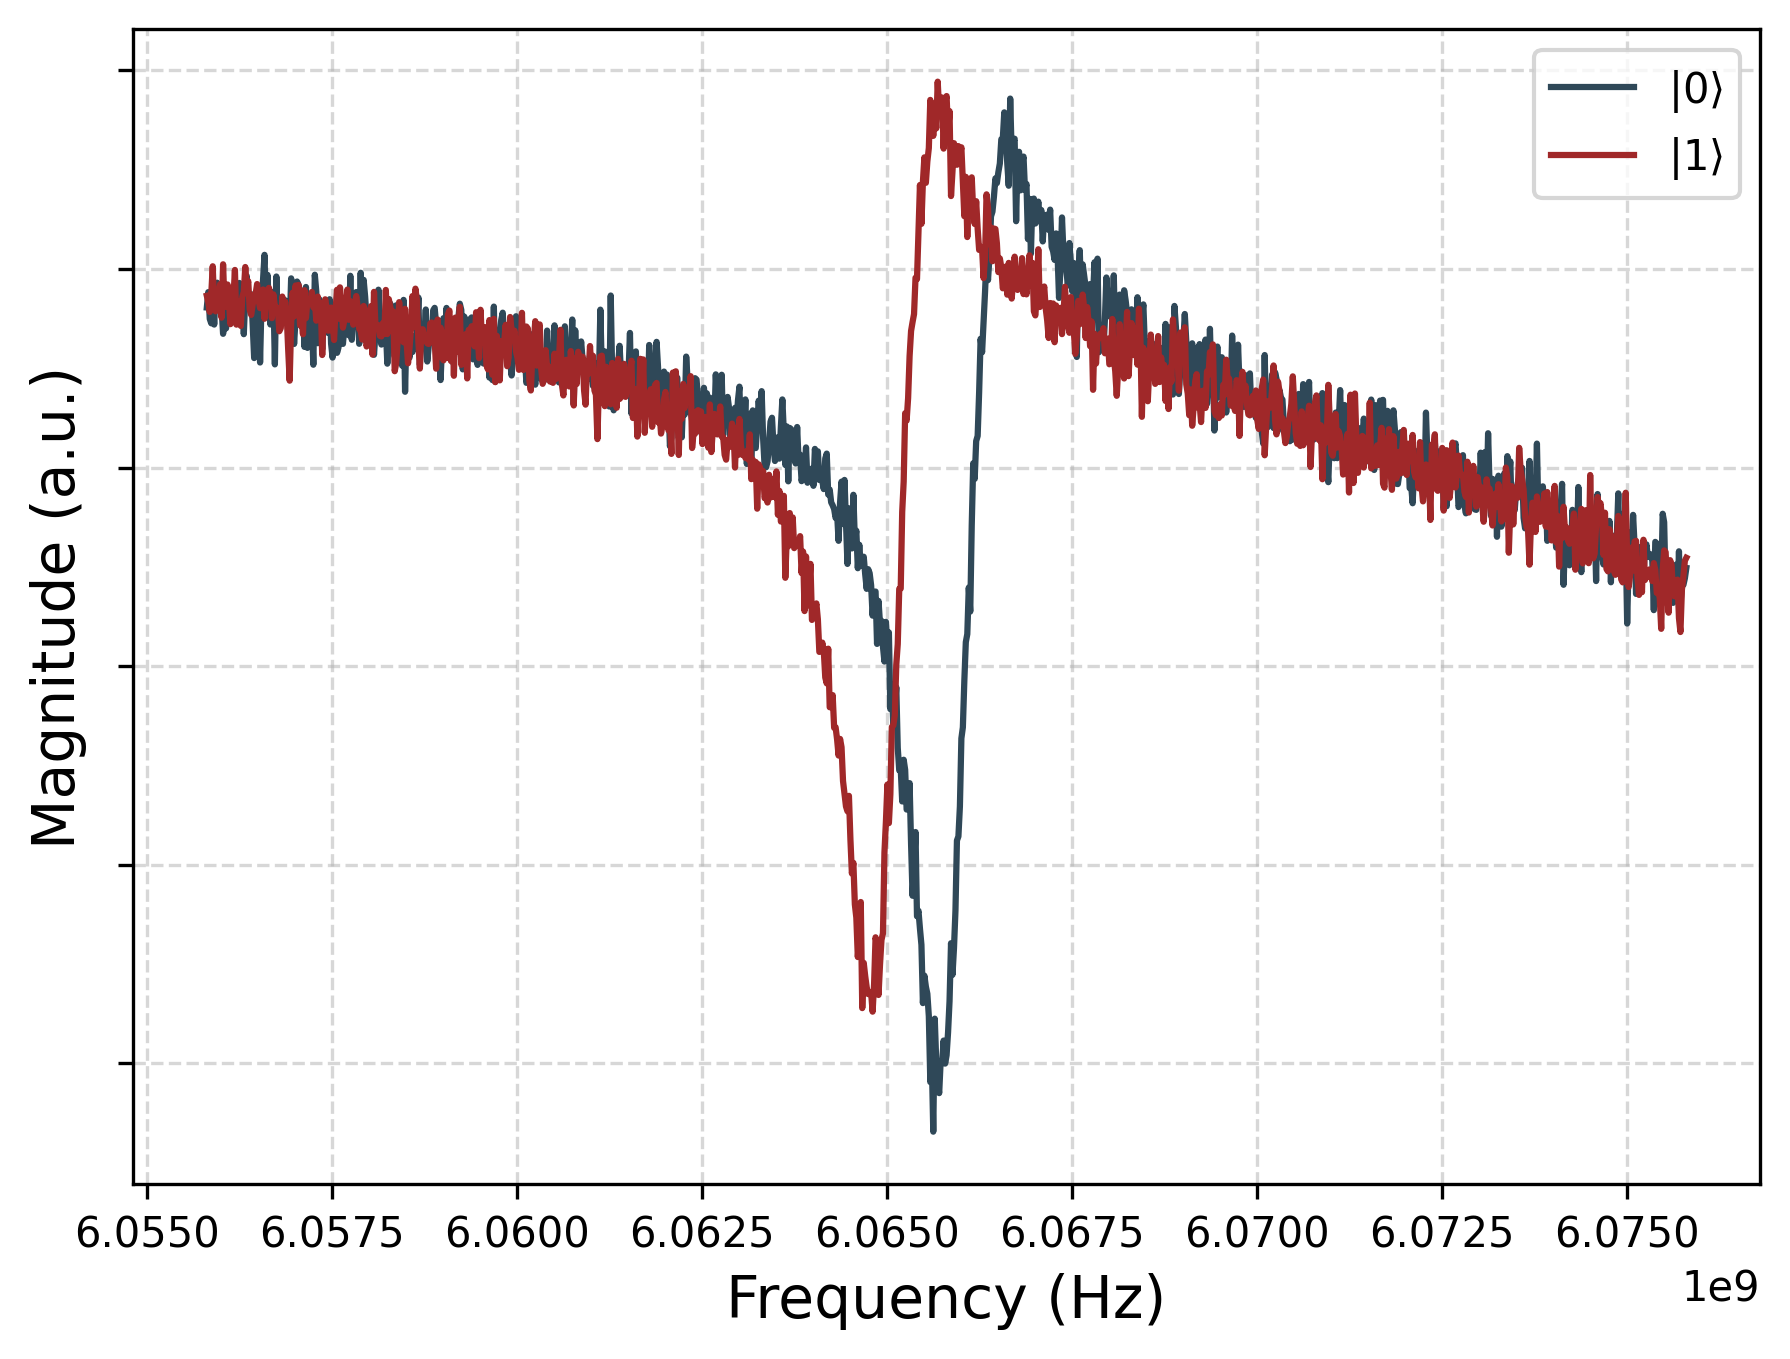

In [50]:
state_0_filename = os.path.join(data_dir_path, "data_00000_0_ghz.s2p")
state_1_filename = os.path.join(data_dir_path, "data_00000_1_ghz.s2p")

fig, axes = plt.subplots(1, 1, figsize=(7, 5))


def plot_net(network, label):
    frequencies_ghz = network.f

    s21_complex = (network.s)[:, 1, 0]

    axes.plot(frequencies_ghz, abs(s21_complex) * (-1e3), label=label)
    axes.set_ylabel('Magnitude (a.u.)')
    axes.set_xlabel('Frequency (Hz)')
    axes.grid(True)
    axes.legend(loc='best')
    plt.yticks([0, -0.1, -0.2, -0.3, -0.4, -0.5], "")


plot_net(rf.Network(state_0_filename), r'|' + str(0) + r"$\rangle$")
plot_net(rf.Network(state_1_filename), r'|' + str(1) + r"$\rangle$")

# fr0_meas = 6.065853e9
# fr1_meas = 6.064932e9
# pulse_frequency = (fr0_meas + fr1_meas) / 2
#
# Q = pulse_frequency / 0.55e6
#
# s_parameters_file_state_0 = S2pUtils.create_resonator_S21(fr0_meas, Q, Q)
# s_parameters_file_state_1 = S2pUtils.create_resonator_S21(fr1_meas, Q, Q)
#
# plot_net(s_parameters_file_state_0, 'sim data |' + str(0) + r"$\rangle$")
# plot_net(s_parameters_file_state_1, 'sim data |' + str(1) + r"$\rangle$")

image_name = 'experimental_s21'
image_path = image_name if images_dir_path is None else os.path.join(images_dir_path, image_name)
plt.savefig(f'{image_path}.pdf')
plt.savefig(f'{image_path}.png')

plt.show()